## **Basic statistical analysis in HealthCare**


## Abstract


This lab is dedicated to downloading, pre-preparing and making statistical analysis of ELISA tests and collected information about IgG and IgM, influenza vaccination, tuberculosis vaccination and previous diseases, blood group respondents have. 


## Introduction


The main problem to be solved in this laboratory is the download and statistical analysis of a DataSet. 

The basic difficulty of statistical analysis of real data is that it is prepared or presented in a form that is not convenient for machine methods of statistical analysis. Therefore, this lab shows methods of automatic pre-preparation of real data for such cases. The next problem is the ability to competently manipulate and transform big data in order to obtain a convenient statistical report both in tabular form and in the form of graphs.

Therefore, the main goal that we are to achieve in this lab is learning how to download, pre-process and conduct basic statistical analysis of personal data obtained during the people survey using modern methods of DataMining.


## Materials and methods


In this lab, we will learn the methods of statistical analysis of data obtained via a people survey on the disease of COVID-19. The laboratory consists of three stages:
* Data download
* Data preparation
* Statistical analysis
* Data visualization

The first stage will show you how to download spreadsheet data:
* indexing of key fields
* working with data types such as datatime
* writing a parser function to automatically create index fields

At the next stage, it will be demonstrated how to pre-prepare data for analysis, in particular:
* elimination of missing data
* replacement and change of cell data
* change the data types of columns

At the stage of statistical analysis, the methods of automation of statistical information calculation will be demonstrated, in particular:
* calculation of basic statistical indicators
* data sorting and grouping
* data transformation DataSet
* calculation of statistical indicators on the transformed data

At the stage of visualization, the possibilities of visualization of the received statistical indicators will be shown.


The statistical data obtained during a survey by scientists of the Department of Artificial Intelligence Systems of the National University of Lviv Polytechnic will be used in this lab.
The research was proved accordingly grant 305.2825-20 Stop COVID'19 of Central European Initiative (CEI)


## Prerequisites
* Python,
* Pandas, https://pandas.pydata.org
* SeaBorn, https://seaborn.pydata.org 
* Statistics


## Objectives


After completing this lab, you will be able to:


* Download a DataSet from *.xlsx files
* Automatically change data in the DataSet
* Transform the table
* Visualize the data with pandas and seaborn
* Expect
     * Minimum and maximum value
     * Average
     * Quarters
     * Pivot tables


## Import Libraries/Define Auxiliary Functions


**Running outside Skills Network Labs.** This notebook was tested within Skills Network Labs. Running in another environment should work as well, but is not guaranteed and may require different setup routine.


Libraries such as Pandas, MatplotLib and SeaBorn should be installed.


In [1]:
# If not using SN-Labs, uncomment the following line to install the required libraries:
# !mamba install -qy -c conda-forge pandas==0.25.1 matplotlib seaborn==0.9.0
!mamba install -qy openpyxl

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


## Download data from a .xlsx file


Some libraries should be imported before you can begin.


In [2]:
import openpyxl
import pandas as pd
from datetime import datetime

The next step is to download the file data from the repository by **[read_excel()](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)**


In [3]:
df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-statistical-analysis/COVID_19.xlsx',
    'Sheet1')

Now let's look at our DataSet.


In [5]:
df.shape

(3308, 14)

In [6]:
df.head()

,Date time,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
0,2020-09-20 11:23:15,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2.0,Yes,Yes,No,No,38.1
1,2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,No,Yes,No,No,37.0
2,2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,Yes,No,37.8
3,2020-09-20 11:23:15,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,No,No,NaN
4,2020-09-20 11:23:15,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1.0,No,Yes,Yes,No,37.4


We can see that the DataSet size is 3308 rows and 14 columns.


However, this DataSet needs some change.


First, you need to select the date and time from the first column as the index field. This will allow you to conveniently group the data depending on the time of its receipt.
Since the date and time can come in different formats, it is convenient to write your own parser function which will transform any date and time format into the Python datetime format.
In our case, we divide any date/time cells into two parts (date and time). Then we allocate only hours, minutes and seconds from time. Then we merge them again and transform them into datetime using **[strptime()](https://docs.python.org/3/library/datetime.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01#datetime.date.strftime)**.
It should also be set how the DataSet describes the missing data because it can negatively affect the statistics.
Then we reload the data from the file.


In [7]:
def parse(x):
    y = x.split()
    t = y[1][:8]
    z=y[0] + " " + t
    d = datetime.strptime(z, '%Y-%m-%d %H:%M:%S')
    return d

In [8]:
df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-statistical-analysis/COVID_19.xlsx',
    'Sheet1',
    na_values="NaN",
    parse_dates=['Date time'],
    index_col=0,
    date_parser=parse)

In [9]:
df.head()

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-20 11:23:15,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2.0,Yes,Yes,No,No,38.1
2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,No,Yes,No,No,37.0
2020-09-20 11:23:15,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,Yes,No,37.8
2020-09-20 11:23:15,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,No,No,NaN
2020-09-20 11:23:15,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1.0,No,Yes,Yes,No,37.4


In [10]:
df.sample(7)

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-12-19 03:38:03,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),1.0,No,Yes,Yes,No,37.0
2020-12-30 14:17:39,23-40,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),1.0,No,Maybe (можливо),No,No,NaN
2020-12-19 02:39:13,23-40,Male (Чоловік),"Ukraine, Lviv (Львів)",Yes,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,Maybe (можливо),Yes,Maybe (можливо),No,NaN
2020-12-19 04:50:35,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),1.0,Yes,Maybe (можливо),No,No,37.3
2020-12-27 17:08:02,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),3.0,No,Yes,No,No,NaN
2020-12-30 03:01:52,23-40,Male (Чоловік),Other (Інше),Yes,No,<0.9 (negative/негативний),<0.9 (negative/негативний),1.0,No,No,Yes,No,NaN
2020-12-30 03:35:02,16-22,Female (Жінка),"Ukraine, Lviv (Львів)",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),1.0,No,Yes,Yes,No,NaN


In [13]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3303,5,23-40,1174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,3297,2,Female (Жінка),1818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,3286,7,"Ukraine, Lviv (Львів)",3078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Do you smoke?,3269,2,No,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Have you had Covid`19 this year?,3305,4,No,1775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IgM level,3232,3,<0.9 (negative/негативний),2662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IgG level,3248,4,<0.9 (negative/негативний),2598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood group,3252.0,NaN,NaN,NaN,1.958487,0.893842,1.0,1.0,2.0,2.0,4.0
Do you vaccinated influenza?,3294,5,No,2658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Do you vaccinated tuberculosis?,3303,6,Yes,2588,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data preparation


Some respondents did not indicate their gender. This will make further analysis of such data impossible.
Remove rows that do not specify gender using **[dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)**:


In [15]:
df = df.dropna(subset=['Gender'])

Some data might be stored in formats that Python misinterprets. Therefore, you can use the **[map()](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=map#pandas.Series.map)** method to replace cell values. For example, you can change the Yes / No value to True / False as follows:


In [16]:
d = {'No' : False, 'Yes' : True}
c = 'Do you vaccinated influenza?'
df.loc[:, c] = df[c].map(d)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [17]:
df.sample()

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-12-24 16:29:10,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,True,Yes,No,No,38.3


For further analysis it is necessary to study the general characteristics of the fields using **[info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=info#pandas.DataFrame.info)**.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3297 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    3296 non-null   object 
 1   Gender                                 3297 non-null   object 
 2   Region                                 3279 non-null   object 
 3   Do you smoke?                          3267 non-null   object 
 4   Have you had Covid`19 this year?       3296 non-null   object 
 5   IgM level                              3221 non-null   object 
 6   IgG level                              3237 non-null   object 
 7   Blood group                            3243 non-null   float64
 8   Do you vaccinated influenza?           3190 non-null   object 
 9   Do you vaccinated tuberculosis?        3294 non-null   object 
 10  Have you had influenza this year?   

We can see that all the data of all columns has non-null object type (except two).
Therefore, it is necessary to transform the data and change the type.

As it can be seen from the table, the Age field should be categorized. For this we can use **[astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=astype#pandas.DataFrame.astype)**:


In [19]:
c = 'Age'
df.loc[:, c] = df[c].astype('category')

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [20]:
df['Age'].head()

Date time
2020-09-20 11:23:15    40-65
2020-09-20 11:23:15    23-40
2020-09-20 11:23:15    23-40
2020-09-20 11:23:15    40-65
2020-09-20 11:23:15    16-22
Name: Age, dtype: category
Categories (5, object): ['0-15', '16-22', '23-40', '40-65', '>65']

We can see that this column has now become categorical and has 5 different categories.


All other fields except the last one contain Cyrillic values, so they need to be replaced and also be made categorical. To do this, use the **[lambda](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=apply#pandas.Series.apply)** function for each cell value in the corresponding columns. The main idea in this case is to find the position of the open parenthesis '( ' in the sentence and return the slice of text before it. If there are no parenthesis in the text, leave the text unchanged.


In [21]:
for c in df.columns[1:-1]:
    df.loc[:, c] = df[c].apply(lambda x : str(x) if str(x).find('(') == -1 else str(x)[:str(x).find('(')] ).astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3297 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Age                                    3296 non-null   category
 1   Gender                                 3297 non-null   category
 2   Region                                 3297 non-null   category
 3   Do you smoke?                          3297 non-null   category
 4   Have you had Covid`19 this year?       3297 non-null   category
 5   IgM level                              3297 non-null   category
 6   IgG level                              3297 non-null   category
 7   Blood group                            3297 non-null   category
 8   Do you vaccinated influenza?           3297 non-null   category
 9   Do you vaccinated tuberculosis?        3297 non-null   category
 10  Have you had influenza t

In [23]:
df.describe()

,Maximum body temperature
count,1529.000000
mean,37.710203
std,0.634367
min,36.600000
25%,37.200000
50%,37.700000
75%,38.300000
max,38.800000


As you can see, the result highlights basic statistical information for all the columns except the categorical ones.
The information includes total, average, standard deviation, minimum, maximum and the values of the main quarters.
In order to display the summary information of category fields, we have to specify the data types we want to display the statistics for:


In [24]:
df.describe(include=['category'])

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?
count,3296,3297,3297,3297,3297,3297,3297,3297,3297,3297,3297,3297
unique,5,2,8,3,5,4,5,5,3,5,5,4
top,23-40,Female,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,False,Yes,No,No
freq,1174,1818,3071,2498,1768,2651,2587,1381,2651,2579,2347,3282


## Statistical analysis


As you can see, statistical information consists of the number of unique values, the value of the most popular category and the number of its values.
The detailed information for a specific column can be obtained as follows (**[value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=value_counts#pandas.Series.value_counts)**):


In [25]:
df['Age'].value_counts()

23-40    1174
40-65    1063
16-22     823
>65       193
0-15       43
Name: Age, dtype: int64

You can also get information in a normalized form.


In [26]:
df['Age'].value_counts(normalize=True)

23-40    0.356189
40-65    0.322512
16-22    0.249697
>65      0.058556
0-15     0.013046
Name: Age, dtype: float64

### Sorting


You can sort the data by one or a group of columns, you can specify the sort direction or create your own sort rules (for example, for category fields) using **[sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=sort_values#pandas.DataFrame.sort_values)**


In [27]:
df.sort_values(by='Age', 
        ascending=True)

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-12-30 02:10:07,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,3.0,False,No,Yes,No,NaN
2020-12-17 19:19:43,0-15,Female,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,False,Maybe,Maybe,No,NaN
2020-12-17 22:59:41,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,False,Yes,Yes,No,NaN
2020-12-17 22:59:41,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,False,Yes,Yes,No,NaN
2020-10-09 19:35:56,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,4.0,False,No,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18 01:44:32,>65,Female,"Ukraine, Lviv",Yes,No,<0.9,<0.9,4.0,False,Yes,Yes,No,NaN
2020-12-18 01:44:32,>65,Female,"Ukraine, Lviv",Yes,No,<0.9,<0.9,4.0,False,Yes,Yes,No,NaN
2020-09-22 17:35:09,>65,Female,"Ukraine, Lviv",No,No,<0.9,<0.9,1.0,False,Yes,No,No,NaN


You should specify the list of fields and the order direction in the **'by'** and **'ascending'** parameters. So, to sort by the fields 'Age' in ascending order and 'Gender' in descending order, you need:


In [28]:
df.sort_values(by=['Age', 'Gender'], ascending=[True, False]).head()

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-20 11:26:09,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,False,Yes,No,No,NaN
2020-09-26 11:19:25,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,4.0,False,No,Yes,No,NaN
2020-09-26 11:42:15,0-15,Male,"Ukraine, Lviv",No,Maybe,<0.9,0.9-1.1,1.0,False,Yes,Maybe,No,38.7
2020-10-09 19:35:56,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,4.0,False,No,Yes,No,NaN
2020-11-24 10:55:41,0-15,Male,"Ukraine, Lviv",No,No,<0.9,0.9-1.1,1.0,False,Yes,No,No,NaN


### Data transformation


To obtain information on a specific category field, you can use:


In [29]:
df['Gender'].value_counts()

Female     1818
Male       1479
Name: Gender, dtype: int64

The list of unique values can be obtained as follows:


In [30]:
df['Gender'].value_counts().keys()

CategoricalIndex(['Female ', 'Male '], categories=['Female ', 'Male '], ordered=False, dtype='category')

The average value of temperature for women only can be obtained as (**[mean()](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=statistical)**):


In [31]:
df[df['Gender'] == 'Female ']['Maximum body temperature'].mean()

37.70680529300562

The maximum temperature of men who smoke and have COVID-19 is:


In [32]:
df[(df['Gender'] == 'Male ') & (df['Do you smoke?'] == 'Yes') & (df['Have you had Covid`19 this year?'] == 'Yes')]['Maximum body temperature'].max()

38.8

Otherwise, you can get complete statistics by class separately by grouping the data.


In [33]:
df.groupby(['Gender'])['Maximum body temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1058.0,37.706805,0.625076,36.6,37.2,37.7,38.2,38.8
Male,471.0,37.717834,0.655371,36.6,37.1,37.7,38.3,38.8


### Pivot tables


Let's suppose that we need to count how many men and women are there of each age group. To do this, use the **[crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=crosstab#pandas.crosstab)** function:


In [34]:
pd.crosstab(df['Age'], df['Gender'])

Gender,Female,Male
Age,,
0-15,15,28
16-22,266,557
23-40,645,529
40-65,795,268
>65,96,97


The table shows that most of the interviewed people are aged from 23 to 65.


To obtain summary information, for example, on body temperature, for men and women of each age group, it is necessary to use a pivot table **[pivot_table()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=pivot_table#pandas.DataFrame.pivot_table)**


In [35]:
pd.pivot_table(df, values= 'Maximum body temperature', index= ['Age'], columns=['Gender'], aggfunc='mean', margins=True)

Gender,Female,Male,All
Age,,,
0-15,38.500000,37.437500,37.555556
16-22,37.731579,37.790196,37.746305
23-40,37.759053,37.754680,37.757473
40-65,37.679435,37.690780,37.681947
>65,37.502041,37.642647,37.583761
All,37.706528,37.717834,37.710013


This table shows the average temperature for women and men in terms of age groups.


## Visualize Data


Now let's visualize our data. 
We will use SeaBorn library.

**Library documentation** 

https://seaborn.pydata.org


Import the library.


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualize the number of surveyed men and women in terms of age groups using **[countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)**:


<AxesSubplot:xlabel='Age', ylabel='count'>

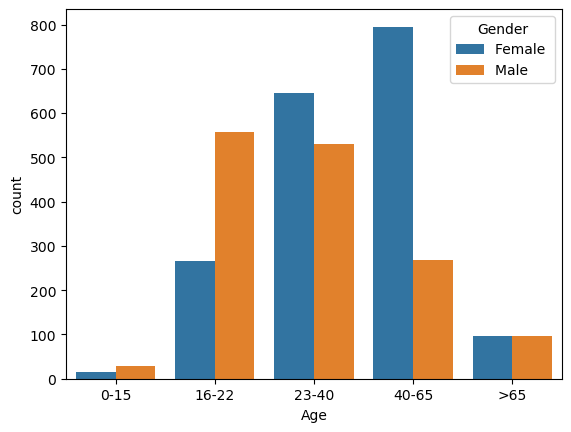

In [37]:
sns.countplot(x='Age', hue='Gender', data=df)

Let's analyze the dynamics of surveys during the whole time of research. To do this, you should group the data by day using the **[resample()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=resample#pandas.DataFrame.resample)** and **[plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=plot#pandas.DataFrame.plot)** methods.


<AxesSubplot:xlabel='Date time'>

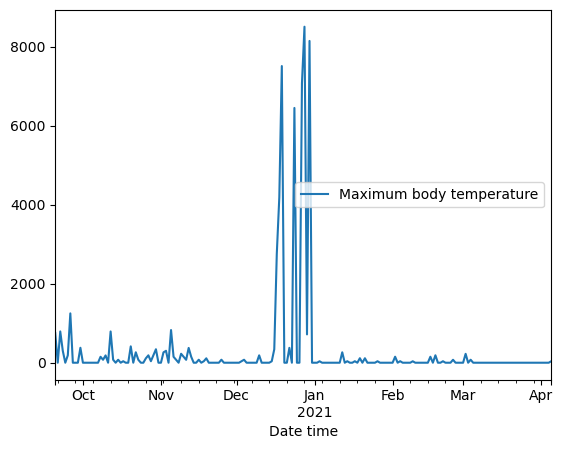

In [38]:
df.resample(str('1D')).sum().plot()

Some of the surveyed patients were sure they had COVID-19 and others weren't. Let's plot the temperature distribution (**[distplot()](https://seaborn.pydata.org/generated/seaborn.distplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)**) of both groups on one figure that contains two graphs (**[subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)**)


<AxesSubplot:xlabel='Maximum body temperature'>

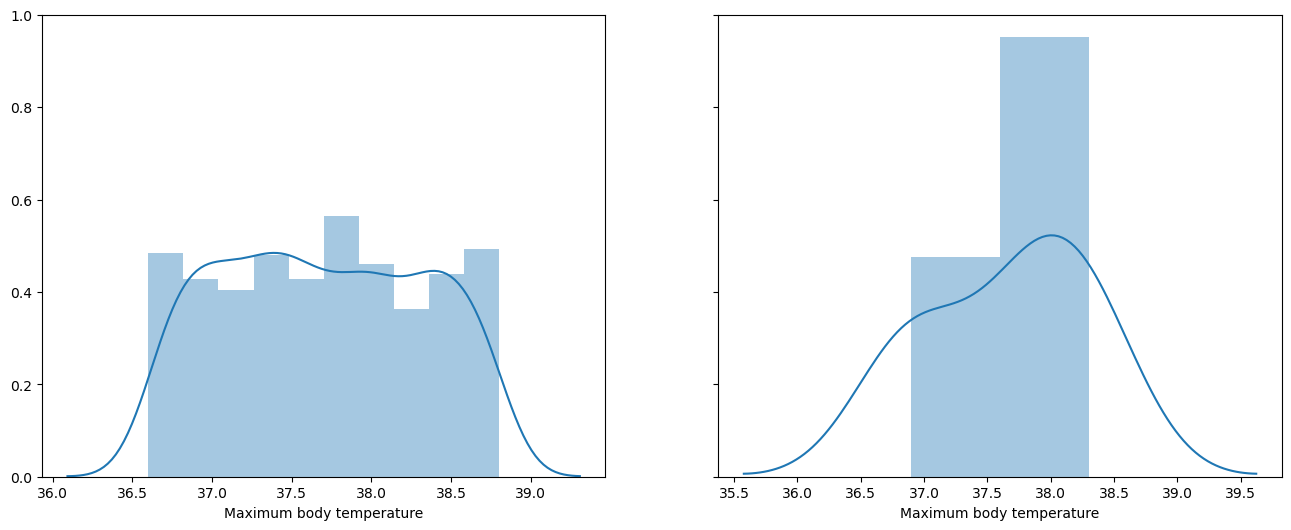

In [39]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

df_t = df[df['Have you had Covid`19 this year?'] == 'Yes'].dropna(subset=['Maximum body temperature'])
sns.distplot(df_t['Maximum body temperature'], ax=axes[0])
df_t = df[df['Have you had Covid`19 this year?'] == 'Maybe'].dropna(subset=['Maximum body temperature'])
sns.distplot(df_t['Maximum body temperature'], ax=axes[1])

We can conclude from the graphs that in case of COVID-19 the temperature can vary widely. People with temperature between 37-38 were not tested and were not sure of their diagnosis.


Let's build temperature dependence on age group (**[boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=boxplot#seaborn.boxplot)** or **[violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)**). The graph shows the data quarters. The midline of the rectangle is the median. The whiskers show the data scatter.


<AxesSubplot:xlabel='Maximum body temperature', ylabel='Age'>

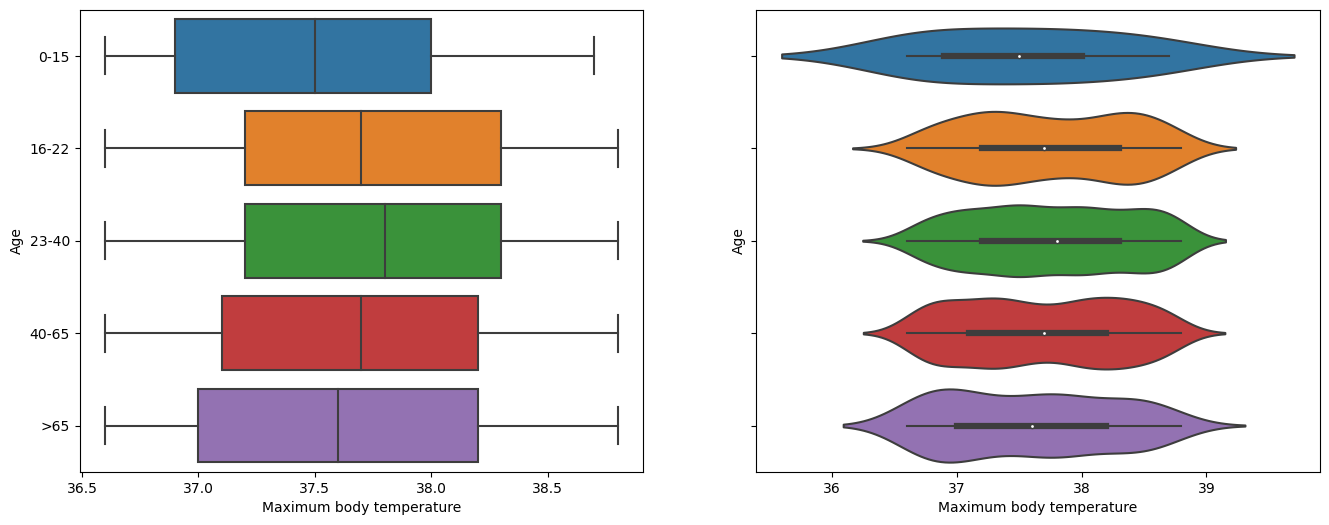

In [40]:
cols = ['Maximum body temperature', 'Maximum body temperature']
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.boxplot(y = df["Age"], x=df["Maximum body temperature"], ax=axes[0])
sns.violinplot(y = df["Age"], x=df["Maximum body temperature"],ax=axes[1] )

## Conclusions


As practice shows, the data obtained in real field experiments is not suitable for direct statistical processing. Therefore, in this lab we learned the basic methods of downloading and preliminary data preparation.
Unlike the well-known classical approaches to statistical data analysis, Python contains many powerful libraries that allow you to manipulate data easily and quickly. Therefore, we have learned the basic methods of automating a library such as Pandas for statistical data analysis. We also learned the basic methods of visualizing the obtained data with the SeaBorn library which also contains effective means of visual data analysis.


## Authors


[Yaroslav Vyklyuk, prof., PhD., DrSc](http://vyklyuk.bukuniver.edu.ua/en/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01).
